In [1]:
#make necessary imports 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# import shap

In [2]:
#load df
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
df = pd.read_csv('eda.csv')
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,Employer Provided Sal,min_sal,max_sal,avg_sal,State,Age,job_in_HQ,has_python,has_spark,has_sql,has_rstudio,has_excel,has_aws,has_tableau,title_simp,seniority,desc_len,num_competitors
0,Data Scientist,53-91,"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,NM,48,0,1,0,0,0,1,0,1,data scientist,na,2555,0
1,Healthcare Data Scientist,63-112,What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5,MD,37,1,1,0,0,0,0,0,0,data scientist,na,4828,0
2,Data Scientist,80-90,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.0,FL,11,1,1,1,1,0,1,0,0,data scientist,na,3495,0
3,Data Scientist,56-97,*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.5,WA,56,1,1,0,0,0,0,0,0,data scientist,na,3926,3
4,Data Scientist,86-143,Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.5,NY,23,1,1,0,1,0,1,0,0,data scientist,na,2748,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,"Sr Scientist, Immuno-Oncology - Oncology",58-111,Site Name: USA - Massachusetts - Cambridge\r\n...,3.9,GSK,"Cambridge, MA","Brentford, United Kingdom",10000+ employees,1830,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10+ billion (USD),"Pfizer, AstraZeneca, Merck",0,0,58,111,84.5,MA,191,0,0,0,0,0,0,1,0,na,senior,6219,3
738,Senior Data Engineer,72-133,THE CHALLENGE\r\nEventbrite has a world-class ...,4.4,Eventbrite,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"See Tickets, TicketWeb, Vendini",0,0,72,133,102.5,TN,15,0,1,1,1,0,0,1,0,data engineer,senior,6167,3
739,"Project Scientist - Auton Lab, Robotics Institute",56-91,The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,-1,0,0,56,91,73.5,PA,37,1,0,0,0,0,1,0,0,na,na,3107,0
740,Data Science Manager,95-160,Data Science ManagerResponsibilities:\r\n\r\nO...,3.2,"Numeric, LLC","Allentown, PA","Chadds Ford, PA",1 to 50 employees,-1,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),-1,0,0,95,160,127.5,PA,-1,1,0,0,0,0,1,0,0,manager,na,1678,0


In [3]:
#choose relevant columns to be used in the model
df.columns 

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors', 'hourly', 'Employer Provided Sal', 'min_sal', 'max_sal', 'avg_sal', 'State', 'Age', 'job_in_HQ', 'has_python', 'has_spark', 'has_sql', 'has_rstudio', 'has_excel', 'has_aws', 'has_tableau', 'title_simp', 'seniority', 'desc_len', 'num_competitors'], dtype='object')

In [4]:
df_mdl = df[['avg_sal', 'Rating', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'num_competitors', 'hourly', 'Employer Provided Sal', 'State', 'job_in_HQ', 'Age', 'has_python', 'has_spark', 'has_sql', 'has_excel', 'has_aws', 'has_tableau', 'title_simp', 'seniority', 'desc_len']]
df_mdl

,avg_sal,Rating,Size,Type of ownership,Industry,Sector,Revenue,num_competitors,hourly,Employer Provided Sal,State,job_in_HQ,Age,has_python,has_spark,has_sql,has_excel,has_aws,has_tableau,title_simp,seniority,desc_len
0,72.0,3.8,501 to 1000 employees,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),0,0,0,NM,0,48,1,0,0,1,0,1,data scientist,na,2555
1,87.5,3.4,10000+ employees,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),0,0,0,MD,1,37,1,0,0,0,0,0,data scientist,na,4828
2,85.0,4.8,501 to 1000 employees,Company - Private,Security Services,Business Services,$100 to $500 million (USD),0,0,0,FL,1,11,1,1,1,1,0,0,data scientist,na,3495
3,76.5,3.8,1001 to 5000 employees,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),3,0,0,WA,1,56,1,0,0,0,0,0,data scientist,na,3926
4,114.5,2.9,51 to 200 employees,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,3,0,0,NY,1,23,1,0,1,1,0,0,data scientist,na,2748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,84.5,3.9,10000+ employees,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10+ billion (USD),3,0,0,MA,0,191,0,0,0,0,1,0,na,senior,6219
738,102.5,4.4,1001 to 5000 employees,Company - Public,Internet,Information Technology,$100 to $500 million (USD),3,0,0,TN,0,15,1,1,1,0,1,0,data engineer,senior,6167
739,73.5,2.6,501 to 1000 employees,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,0,0,0,PA,1,37,0,0,0,1,0,0,na,na,3107
740,127.5,3.2,1 to 50 employees,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),0,0,0,PA,1,-1,0,0,0,1,0,0,manager,na,1678


In [5]:
#get dummy data for categorical columns
df_dummy = pd.get_dummies(df_mdl)

In [39]:
df_dummy #number of columns has increased to 180

,avg_sal,Rating,num_competitors,hourly,Employer Provided Sal,job_in_HQ,Age,has_python,has_spark,has_sql,has_excel,has_aws,has_tableau,desc_len,Size_-1,Size_1 to 50 employees,Size_10000+ employees,Size_1001 to 5000 employees,Size_201 to 500 employees,Size_5001 to 10000 employees,Size_501 to 1000 employees,Size_51 to 200 employees,Size_Unknown,Type of ownership_-1,Type of ownership_College / University,Type of ownership_Company - Private,Type of ownership_Company - Public,Type of ownership_Government,Type of ownership_Hospital,Type of ownership_Nonprofit Organization,Type of ownership_Other Organization,Type of ownership_School / School District,Type of ownership_Subsidiary or Business Segment,Type of ownership_Unknown,Industry_-1,Industry_Accounting,Industry_Advertising & Marketing,Industry_Aerospace & Defense,Industry_Architectural & Engineering Services,Industry_Auctions & Galleries,Industry_Banks & Credit Unions,Industry_Beauty & Personal Accessories Stores,Industry_Biotech & Pharmaceuticals,Industry_Brokerage Services,Industry_Colleges & Universities,Industry_Computer Hardware & Software,Industry_Construction,Industry_Consulting,Industry_Consumer Product Rental,Industry_Consumer Products Manufacturing,"Industry_Department, Clothing, & Shoe Stores",Industry_Education Training Services,Industry_Energy,Industry_Enterprise Software & Network Solutions,Industry_Farm Support Services,Industry_Federal Agencies,Industry_Financial Analytics & Research,Industry_Financial Transaction Processing,Industry_Food & Beverage Manufacturing,Industry_Gambling,Industry_Gas Stations,Industry_Health Care Products Manufacturing,Industry_Health Care Services & Hospitals,"Industry_Health, Beauty, & Fitness",Industry_IT Services,Industry_Industrial Manufacturing,Industry_Insurance Agencies & Brokerages,Industry_Insurance Carriers,Industry_Internet,Industry_Investment Banking & Asset Management,Industry_K-12 Education,Industry_Lending,Industry_Logistics & Supply Chain,Industry_Metals Brokers,Industry_Mining,Industry_Motion Picture Production & Distribution,Industry_Other Retail Stores,Industry_Real Estate,Industry_Religious Organizations,Industry_Research & Development,Industry_Security Services,Industry_Social Assistance,Industry_Sporting Goods Stores,Industry_Staffing & Outsourcing,Industry_Stock Exchanges,Industry_TV Broadcast & Cable Networks,Industry_Telecommunications Manufacturing,Industry_Telecommunications Services,Industry_Transportation Equipment Manufacturing,Industry_Transportation Management,Industry_Travel Agencies,Industry_Trucking,Industry_Video Games,Industry_Wholesale,Sector_-1,Sector_Accounting & Legal,Sector_Aerospace & Defense,Sector_Agriculture & Forestry,"Sector_Arts, Entertainment & Recreation",Sector_Biotech & Pharmaceuticals,Sector_Business Services,"Sector_Construction, Repair & Maintenance",Sector_Consumer Services,Sector_Education,Sector_Finance,Sector_Government,Sector_Health Care,Sector_Information Technology,Sector_Insurance,Sector_Manufacturing,Sector_Media,Sector_Mining & Metals,Sector_Non-Profit,"Sector_Oil, Gas, Energy & Utilities",Sector_Real Estate,Sector_Retail,Sector_Telecommunications,Sector_Transportation & Logistics,Sector_Travel & Tourism,Revenue_$1 to $2 billion (USD),Revenue_$1 to $5 million (USD),Revenue_$10 to $25 million (USD),Revenue_$10+ billion (USD),Revenue_$100 to $500 million (USD),Revenue_$2 to $5 billion (USD),Revenue_$25 to $50 million (USD),Revenue_$5 to $10 billion (USD),Revenue_$5 to $10 million (USD),Revenue_$50 to $100 million (USD),Revenue_$500 million to $1 billion (USD),Revenue_-1,Revenue_Less than $1 million (USD),Revenue_Unknown / Non-Applicable,State_AL,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_MI,State_MN,State_MO,State_NC,State_NE,State_NJ,State_NM,State_NY,State_OH,State_OR,State_PA,State_RI,State_SC,State_TN,State_TX,State_UT,State_VA,State_WA,State_WI,title_simp_

In [7]:
#create train test splits
X = df_dummy.drop('avg_sal', axis=1)
y = df_dummy.avg_sal.values #presents it as a numpy array instead of a series obj 
                            #it is more accurate to do it this way


from sklearn.model_selection import train_test_split
#help(train_test_split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
#mutliple linear regression
import statsmodels.api as sm

X_sm = X = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()
#P values of less than 0.05 shows that the feature is important in salary prediction
#Coefficient value shows how the feature affects the avg sal, inc by one unit = inc/dec by x thousand in avg sal

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     9.304
Date:                Thu, 17 Feb 2022   Prob (F-statistic):           2.32e-87
Time:                        16:28:06   Log-Likelihood:                -3305.9
No. Observations:                 742   AIC:                             6902.
Df Residuals:                     597   BIC:                             7570.
Df Model:                         144                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                43.7244      6.382      6.851      0.000      31.191      56.258
Rating                                                3.3900      1.923      1.763      0.078      -0.387       7.167
num_competitors                                       2.2084      0.864      2.556      0.011       0.512       3.905
hourly                                              -14.2118      9.139     -1.555      0.120     -32.161       3.738
Employer Provided Sal                                31.6724     11.532      2.747      0.006       9.024      54.320
job_in_HQ                                             3.1059      2.933      1.059      0.290      -2.654       8.866
Age                                                   0.0325      0.030      1.084      0.279      -0.026       0.091
has_python                                            9.0975      2.571      3.538      0.000       4.048      14.147
has_spark                                            -0.6443      2.908     -0.222      0.825      -6.356       5.068
has_sql                                              -1.4930      2.648     -0.564      0.573      -6.693       3.707
has_excel                                             0.2432      2.258      0.108      0.914      -4.192       4.678
has_aws                                               0.3701      2.724      0.136      0.892      -4.980       5.720
has_tableau                                          -6.0825      3.043     -1.999      0.046     -12.059      -0.106
desc_len                                             -0.0002      0.001     -0.332      0.740      -0.002       0.001
Size_-1                                              13.3795      8.608      1.554      0.121      -3.526      30.285
Size_1 to 50 employees                                1.5736      6.452      0.244      0.807     -11.098      14.245
Size_10000+ employees                                -4.0985      5.808     -0.706      0.481     -15.506       7.309
Size_1001 to 5000 employees                           6.9417      3.892      1.783      0.075      -0.703      14.586
Size_201 to 500 employees                             3.1907      3.908      0.816      0.415      -4.485      10.866
Size_5001 to 10000 employees                         -6.4263      5.438     -1.182      0.238     -17.106       4.253
Size_501 to 1000 employees                            3.1496      4.100      0.768      0.443      -4.903      11.202
Size_51 to 200 employees                              4.8971      4.399      1.113      0.266      -3.743      13.537
Size_Unknown                                         21.1171     14.025      1.506      0.133      -6.428      48.662
Type of ownersh

In [9]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score #think of cross val as a mini train test split
#it takes a small sample of the data, predicts it and compares it with the rest of the data to see 
#whether the predictions were accurate 

lm = LinearRegression()
lm.fit(X_train, y_train)

np.mean(cross_val_score(lm,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 5))
#difficult to get acc predictions with such sparse data

-19.350107808835162

,alpha,error
16,0.17,-19.294851


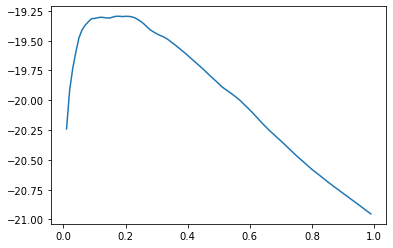

In [10]:
#lasso regression - bc the data is going to be so sparse with all the dummy varibles,
#lasso helps us normalize that 
#lasso is good when many features are being used to determine the label as it carries out 
#regularization, ignoring unimportant features and using useful ones
# lasso regression 
lm_l = Lasso(alpha=.13)
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

#let's try for diff alpha values
alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))
    
plt.plot(alpha,error)

err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

#the error is lowest when the alpha is 0.17
#increase in alpha brings about dec in coefficients

In [11]:
#random forest - we'll have a tree based model to compare to linear models
#decision tree could prove useful in this scenario as there are many 0 and 1 values
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3))

#MOST ACCURATE SO FAR!!

-14.867525936180757

In [12]:
#tune the models using GridsearchCV
#GridsearchCV runs all the models and spits out the one with the best results after parameters
#have been input 
# tune models GridsearchCV 
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,300,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}

gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ('mse', 'mae'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': range(10, 300, 10)},
             scoring='neg_mean_absolute_error')

In [13]:
gs.best_estimator_ #what was the best estimator 

RandomForestRegressor(n_estimators=140)

In [14]:
gs.best_score_

-14.655382718897947

In [15]:
#test the ensembles to see how they predict salaries
tpred_lm = lm.predict(X_test)
tpred_lml = lm_l.predict(X_test)
tpred_rf = gs.best_estimator_.predict(X_test)

from sklearn.metrics import mean_absolute_error,mean_squared_error

In [16]:
mean_absolute_error(y_test,tpred_lm)

18.807775913282143

In [17]:
mean_absolute_error(y_test,tpred_lml)

19.779266725991825

In [26]:
mean_absolute_error(y_test,tpred_rf) #did the best SO WE'LL USE IT!

10.741826462128476

In [28]:
np.sqrt(mean_squared_error(y_test, tpred_rf)) #punishes for larger errors
#random forest is clearly the best

17.615015419630026

In [20]:
mean_absolute_error(y_test,(tpred_lm+tpred_rf)/2)

13.944943973379837

In [29]:
np.sqrt(mean_squared_error(y_test, (tpred_lm+tpred_rf)/2)) #punishes for larger errors

19.93489855209013

In [ ]:
# explainer = shap.TreeExplainer(gs.best_estimator_)

In [30]:
#next we will pickle the model, allowing it make predictions without training it every time
#because it has already been trained

# import pickle
# pickl = {'model': gs.best_estimator_}
# pickle.dump( pickl, open( 'model_file' + ".p", "wb" ) )

# file_name = "model_file.p"
# with open(file_name, 'rb') as pickled:
#     data = pickle.load(pickled)
#     model = data['model']

# model.predict(np.array(list(X_test.iloc[1,:])).reshape(1,-1))[0]

# list(X_test.iloc[1,:])

[3.6,
 0.0,
 0.0,
 0.0,
 1.0,
 35.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 4644.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,


In [33]:
#save the model
from joblib import dump, load

In [34]:
dump(gs.best_estimator_, 'salary_model.joblib')

['salary_model.joblib']

In [43]:
# df_dummy = df_dummy.rename(columns={'Employer Provided Sal': 'Employer_Provided_Sal', 'Size_-1': 'Size_neg1'})

In [44]:
df_dummy

,avg_sal,Rating,num_competitors,hourly,Employer_Provided_Sal,job_in_HQ,Age,has_python,has_spark,has_sql,has_excel,has_aws,has_tableau,desc_len,Size_neg1,Size_1 to 50 employees,Size_10000+ employees,Size_1001 to 5000 employees,Size_201 to 500 employees,Size_5001 to 10000 employees,Size_501 to 1000 employees,Size_51 to 200 employees,Size_Unknown,Type of ownership_-1,Type of ownership_College / University,Type of ownership_Company - Private,Type of ownership_Company - Public,Type of ownership_Government,Type of ownership_Hospital,Type of ownership_Nonprofit Organization,Type of ownership_Other Organization,Type of ownership_School / School District,Type of ownership_Subsidiary or Business Segment,Type of ownership_Unknown,Industry_-1,Industry_Accounting,Industry_Advertising & Marketing,Industry_Aerospace & Defense,Industry_Architectural & Engineering Services,Industry_Auctions & Galleries,Industry_Banks & Credit Unions,Industry_Beauty & Personal Accessories Stores,Industry_Biotech & Pharmaceuticals,Industry_Brokerage Services,Industry_Colleges & Universities,Industry_Computer Hardware & Software,Industry_Construction,Industry_Consulting,Industry_Consumer Product Rental,Industry_Consumer Products Manufacturing,"Industry_Department, Clothing, & Shoe Stores",Industry_Education Training Services,Industry_Energy,Industry_Enterprise Software & Network Solutions,Industry_Farm Support Services,Industry_Federal Agencies,Industry_Financial Analytics & Research,Industry_Financial Transaction Processing,Industry_Food & Beverage Manufacturing,Industry_Gambling,Industry_Gas Stations,Industry_Health Care Products Manufacturing,Industry_Health Care Services & Hospitals,"Industry_Health, Beauty, & Fitness",Industry_IT Services,Industry_Industrial Manufacturing,Industry_Insurance Agencies & Brokerages,Industry_Insurance Carriers,Industry_Internet,Industry_Investment Banking & Asset Management,Industry_K-12 Education,Industry_Lending,Industry_Logistics & Supply Chain,Industry_Metals Brokers,Industry_Mining,Industry_Motion Picture Production & Distribution,Industry_Other Retail Stores,Industry_Real Estate,Industry_Religious Organizations,Industry_Research & Development,Industry_Security Services,Industry_Social Assistance,Industry_Sporting Goods Stores,Industry_Staffing & Outsourcing,Industry_Stock Exchanges,Industry_TV Broadcast & Cable Networks,Industry_Telecommunications Manufacturing,Industry_Telecommunications Services,Industry_Transportation Equipment Manufacturing,Industry_Transportation Management,Industry_Travel Agencies,Industry_Trucking,Industry_Video Games,Industry_Wholesale,Sector_-1,Sector_Accounting & Legal,Sector_Aerospace & Defense,Sector_Agriculture & Forestry,"Sector_Arts, Entertainment & Recreation",Sector_Biotech & Pharmaceuticals,Sector_Business Services,"Sector_Construction, Repair & Maintenance",Sector_Consumer Services,Sector_Education,Sector_Finance,Sector_Government,Sector_Health Care,Sector_Information Technology,Sector_Insurance,Sector_Manufacturing,Sector_Media,Sector_Mining & Metals,Sector_Non-Profit,"Sector_Oil, Gas, Energy & Utilities",Sector_Real Estate,Sector_Retail,Sector_Telecommunications,Sector_Transportation & Logistics,Sector_Travel & Tourism,Revenue_$1 to $2 billion (USD),Revenue_$1 to $5 million (USD),Revenue_$10 to $25 million (USD),Revenue_$10+ billion (USD),Revenue_$100 to $500 million (USD),Revenue_$2 to $5 billion (USD),Revenue_$25 to $50 million (USD),Revenue_$5 to $10 billion (USD),Revenue_$5 to $10 million (USD),Revenue_$50 to $100 million (USD),Revenue_$500 million to $1 billion (USD),Revenue_-1,Revenue_Less than $1 million (USD),Revenue_Unknown / Non-Applicable,State_AL,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_MI,State_MN,State_MO,State_NC,State_NE,State_NJ,State_NM,State_NY,State_OH,State_OR,State_PA,State_RI,State_SC,State_TN,State_TX,State_UT,State_VA,State_WA,State_WI,title_sim

In [40]:
df['Size'].unique()

array(['501 to 1000 employees', '10000+ employees',
       '1001 to 5000 employees', '51 to 200 employees',
       '201 to 500 employees', '5001 to 10000 employees',
       '1 to 50 employees', 'Unknown', '-1'], dtype=object)